In [1]:
#import algo file
import pandas as pd
from pathlib import Path
import numpy as np
import datetime as dt
import seaborn as sns

algo1=Path("algo_returns.csv")
algo=pd.read_csv(algo1, index_col="Date",infer_datetime_format=True, parse_dates=True)

algo=algo.dropna().copy()
algo.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [2]:
#import Whale file
import pandas as pd
from pathlib import Path
import numpy as np
import datetime as dt
import seaborn as sns

whale1=Path("whale_returns.csv")
whale=pd.read_csv(whale1, index_col="Date",infer_datetime_format=True, parse_dates=True)
whale=whale.dropna().copy()
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [3]:
#import SP file,drop NA

import pandas as pd
from pathlib import Path
import numpy as np
import datetime as dt
import seaborn as sns

sp1=Path("sp_tsx_history.csv")
sp=pd.read_csv(sp1, index_col="Date",infer_datetime_format=True, parse_dates=True)
sp=sp.dropna().copy()
sp.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [4]:
sp["Close"] = sp["Close"].str. replace("$", "").str.replace(",", "")

sp["Close"]


/var/folders/d2/5c_q0bh9617054cn27f0wjcw0000gn/T/ipykernel_35232/2352524587.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp["Close"] = sp["Close"].str. replace("$", "").str.replace(",", "")


Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: object

In [5]:
#drop NA 
sp=sp.dropna().copy()
sp.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [6]:
#change data type
sp["Close"] = sp["Close"].astype("float")



In [7]:
#daily return for sp_tsx_historical
sp=sp.pct_change()

In [8]:
sp.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [9]:
#rename close to SP
sp.rename(columns={"Close":"SP"},inplace=True)
        

In [10]:
#check data and drop NA 
sp=sp.dropna().copy()
sp.head()

,SP
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [11]:
#combine3 Excel together
allReturn1=pd.concat([algo, whale, sp], axis="columns", join="inner")

allReturn1

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.003371
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001344
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,0.000682,-0.007247,-0.000285,-0.001291,-0.005153,0.004848,-0.000628
2019-04-26,0.002981,0.005256,0.008149,0.009162,0.012355,0.010434,0.002254
2019-04-29,0.005208,0.002829,0.001254,0.002719,0.006251,0.005223,-0.000788


#perform Quantitative Analysis

In [12]:
#Calculate and Plot daily return for all
allReturn1=(1+allReturn1).cumprod()-1
allReturn1.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530
2015-03-04,-0.010514,0.001464,0.000962,-0.001755,-0.003028,-0.002383,-0.011872
2015-03-05,-0.011459,0.005794,0.004981,0.002314,-0.000681,0.004327,-0.010544
2015-03-06,-0.016359,-0.005733,-0.002963,-0.001269,-0.009156,-0.008828,-0.020411
2015-03-09,-0.021717,-0.004437,-0.002383,0.002951,-0.003367,-0.010466,-0.026832


<AxesSubplot:xlabel='Date'>

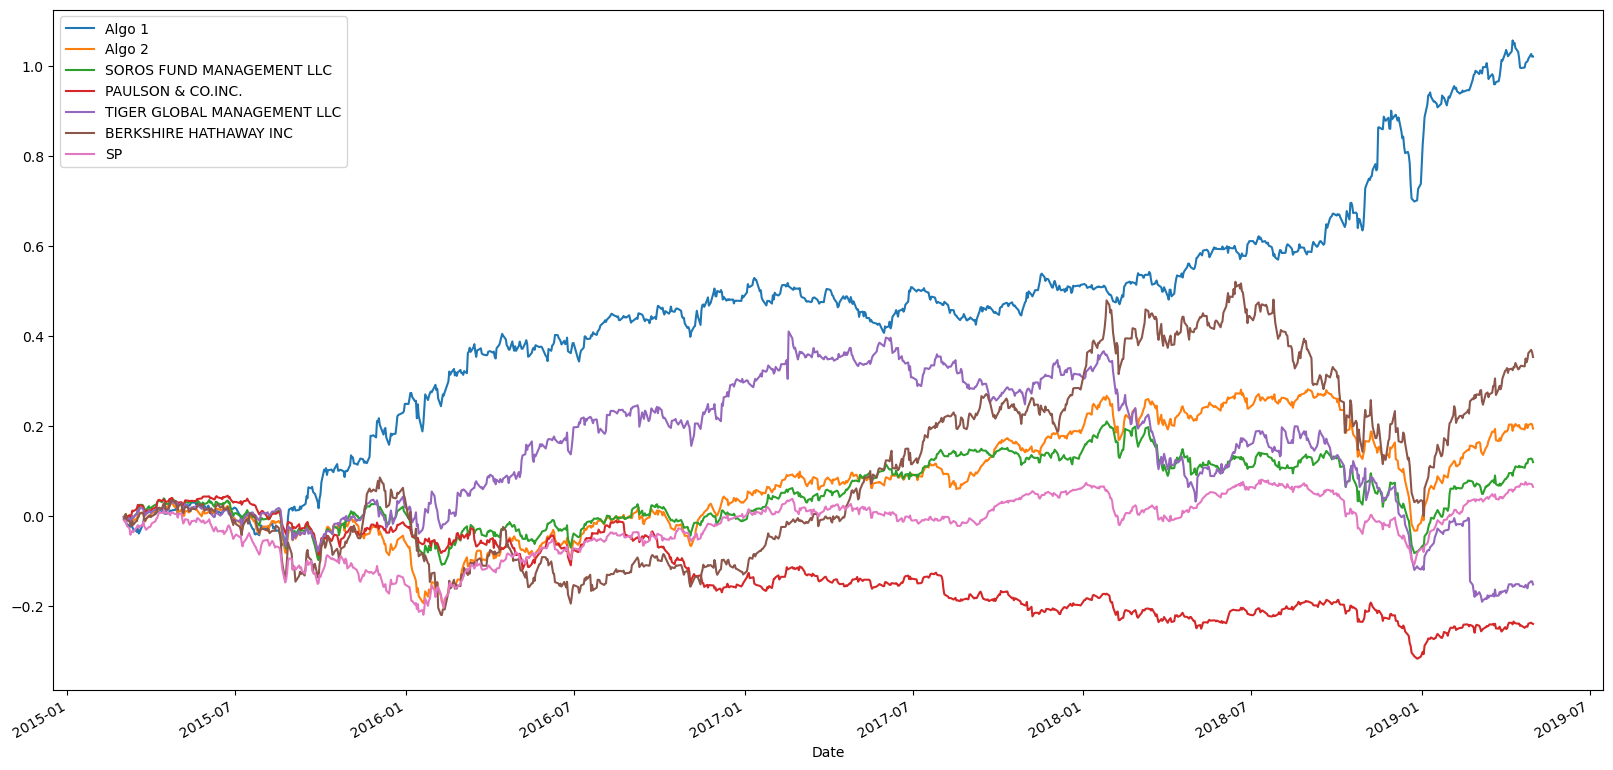

In [13]:
#Plot daily return for all
allReturn1.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

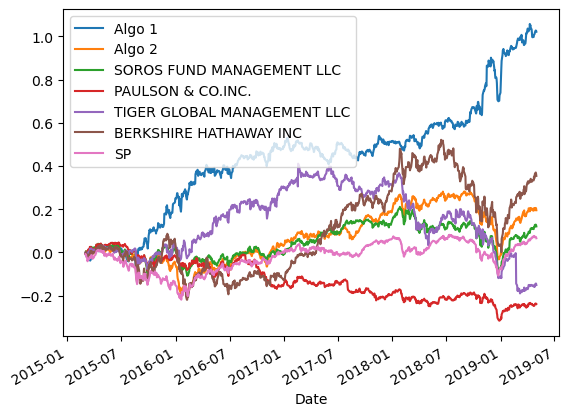

In [14]:
#Plot for cumulative return for all
allReturn1.plot()

In [15]:
#Risk Analysis
#boxplot for each return 


<AxesSubplot:>

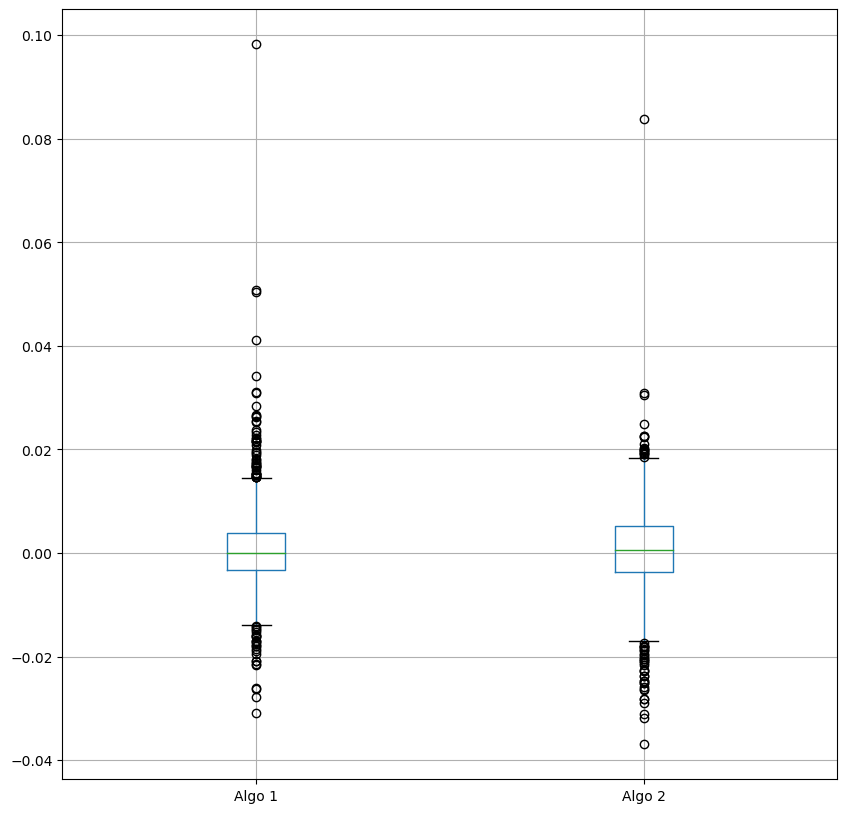

In [16]:
#boxplot for algo
algo.boxplot(figsize=(10,10))

<AxesSubplot:>

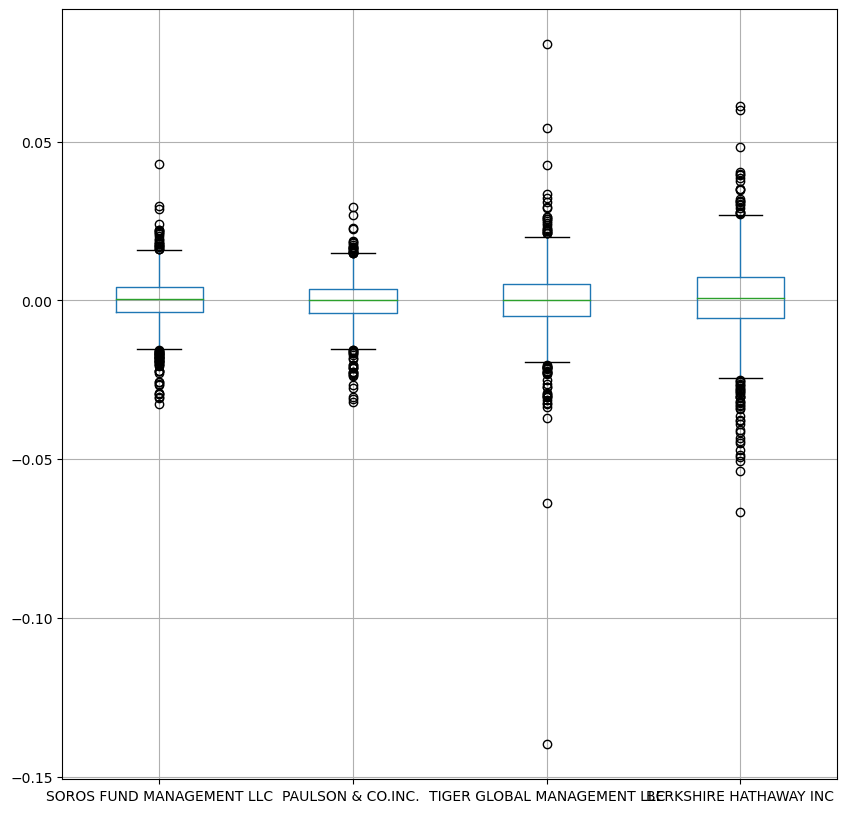

In [17]:
#boxplot for whale
whale.boxplot(figsize=(10,10))

<AxesSubplot:>

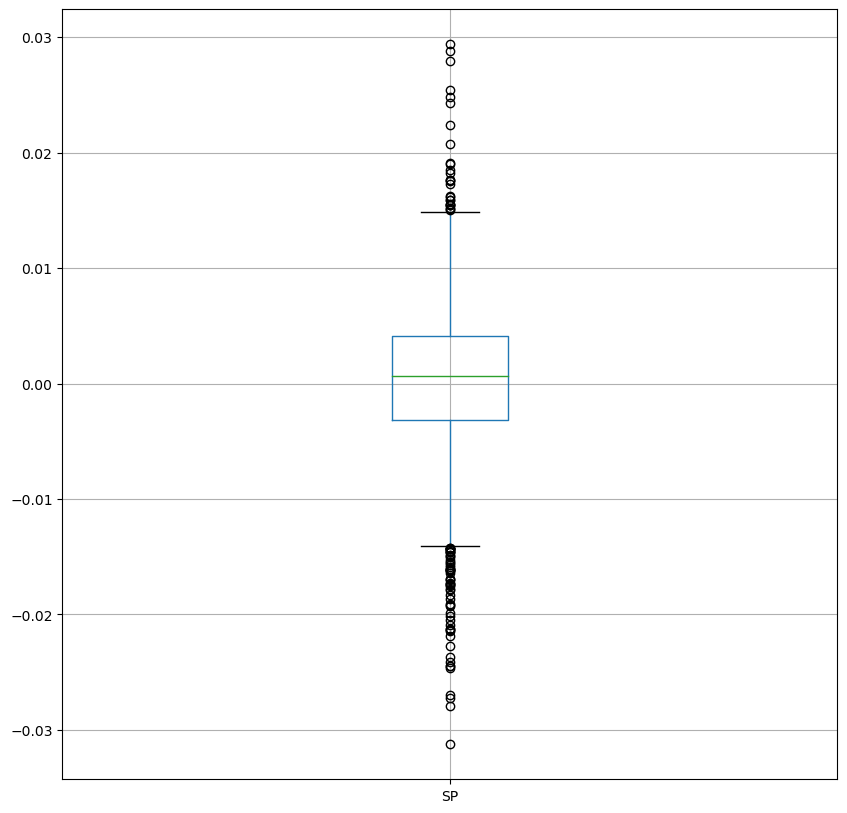

In [18]:
##boxplot for SP
sp.boxplot(figsize=(10,10))

In [19]:
#calclate Sta Dev for each portfolio
allReturn1_std=allReturn1.std()
allReturn1_std.head()

Algo 1                         0.258839
Algo 2                         0.116607
SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
dtype: float64

In [20]:
#double check Sta Dev for each one
#algo
algo_std=algo.std()
algo_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [21]:
#whale std dev
whale_std=whale.std()
whale_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [22]:
#SP std dev
sp_std=sp.std()
sp_std.head()

SP    0.006637
dtype: float64

In [23]:
#determine who is risker
#answer is who is greater than 0.006637...hence all Algo and Whale are risker than S&P TSX 60

In [24]:
#calculate annualised std dev
allReturn1_annStdDev=allReturn1_std*np.sqrt(252)
allReturn1_annStdDev.head()

Algo 1                         4.108944
Algo 2                         1.851072
SOROS FUND MANAGEMENT LLC      1.115525
PAULSON & CO.INC.              1.440370
TIGER GLOBAL MANAGEMENT LLC    2.360896
dtype: float64

In [25]:
#check algo Annualied Std Dev again 
algo_annStdDev=algo_std*np.sqrt(252)
algo_annStdDev.head()

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [26]:
#check whale Annualied Std Dev again 
whale_annStdDev=whale_std*np.sqrt(252)
whale_annStdDev.head()

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [27]:
#check S&P Annualied Std Dev again 
sp_annStdDev=sp_std*np.sqrt(252)
sp_annStdDev.head()

SP    0.105365
dtype: float64

<AxesSubplot:xlabel='Date'>

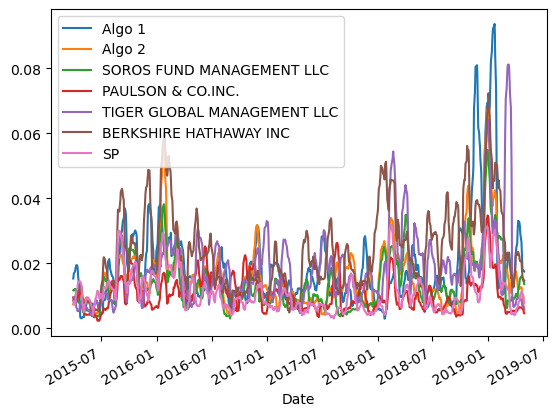

In [28]:
##Rolling Statistics
allReturn1.rolling(window=21).std().plot()

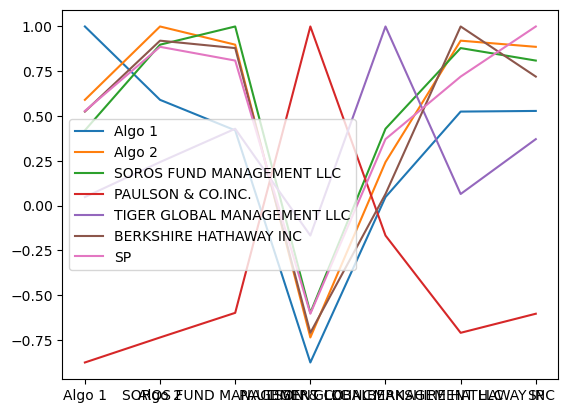

In [51]:
#calculate +plot +correlation
allReturn1_correlation = allReturn1.corr().plot()

In [30]:
#choose one portfolio+60days rollinf_beta vs S&P
TIGER_rol_Variance=allReturn1['SP'].rolling(window=60).var()
TIGER_rol_Covariance=allReturn1['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(allReturn1['SP'])



In [31]:
#Beta for tiger
TIGER_beta=TIGER_rol_Covariance/TIGER_rol_Variance


<AxesSubplot:xlabel='Date'>

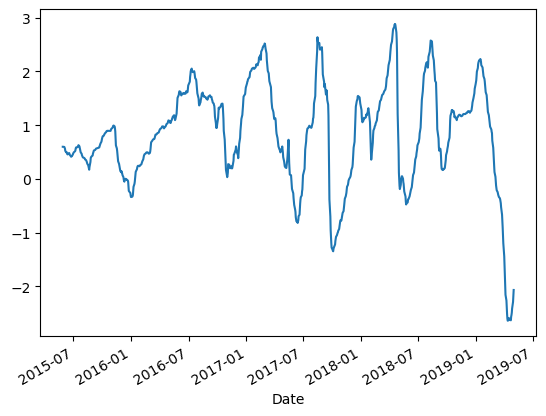

In [32]:
#PLOT 
TIGER_beta.plot()

In [33]:
##Sharpe ratios
sharpe1=(allReturn1.mean()*252)/(allReturn1.std()*np.sqrt(252))
sharpe1.head()


Algo 1                         27.120044
Algo 2                          9.942376
SOROS FUND MANAGEMENT LLC      11.402242
PAULSON & CO.INC.             -22.381050
TIGER GLOBAL MANAGEMENT LLC    15.001554
dtype: float64

<AxesSubplot:>

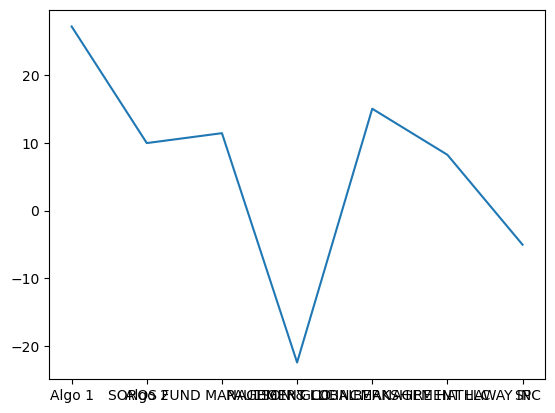

In [34]:
#Bar Plot for Sharpe
#impot matplotlib.pyplot as plt
#name=['Algo 1', 'Algo 2', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC ']
#plt.bar(name,ratio)
#plt.show
sharpe1.plot()

In [35]:
#determine 
#sharpe1.plot.bar()

In [36]:
#Custom Portflio-import file
I_historical=Path("l_historical.csv")
I_historical=pd.read_csv(I_historical, index_col="Date",infer_datetime_format=True, parse_dates=True)

I_historical=I_historical.sort_index()
I_historical.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [37]:
#Custom Portflio-import file
otex=Path("otex_historical.csv")
otex=pd.read_csv(otex, index_col="Date",infer_datetime_format=True, parse_dates=True)

otex=otex.sort_index()
otex.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [38]:
#Custom Portflio-import file
shop=Path("shop_historical.csv")
shop=pd.read_csv(shop, index_col="Date",infer_datetime_format=True, parse_dates=True)

shop=shop.sort_index()
shop.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [39]:
#Create a comnination of 3 exccel and calculate daily return
all2=pd.concat([I_historical, otex,shop],axis="rows", join="inner")
all2=all2.reset_index()
all2=all2.pivot_table(values="Close", index="Date", columns="Symbol")
all2.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [40]:
#calculate daily return
all_returns2=all2.pct_change()
all_returns2.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392


In [41]:
#calculate weighted return
L_weight=0.33333
otex_weight=0.33333
shop_weight=0.33333
portfolio_returns2=L_weight*all_returns2+ otex_weight*all_returns2+shop_weight*all_returns2
portfolio_returns2.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.010002,-0.011702,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007923,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392


In [42]:
#check 
weights=[0.33333,0.33333,0.33333]
portfolio_returns3=all_returns2.dot(weights)
portfolio_returns3.head()

Date
2018-01-02         NaN
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
dtype: float64

In [43]:
#add new batch portfolio with previous batch
all3=pd.concat([all_returns2,allReturn1], axis="columns", join="inner")
all3.head()

,L,OTEX,SHOP,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP
Date,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,0.516403,0.205540,0.155385,-0.185770,0.306227,0.321833,0.067809
2018-01-03,-0.010002,-0.011703,0.023398,0.515053,0.215396,0.160766,-0.185748,0.308812,0.329337,0.071839
2018-01-04,0.000174,-0.003715,0.017092,0.513668,0.220615,0.159705,-0.182331,0.322872,0.334740,0.074549
2018-01-05,0.000000,-0.007924,-0.001455,0.507857,0.228433,0.164426,-0.181658,0.323847,0.364135,0.070392
2018-01-08,-0.009753,-0.009631,0.016392,0.510350,0.229241,0.169634,-0.184718,0.330579,0.368820,0.068311


In [44]:
#clean data
all3.dropna()

,L,OTEX,SHOP,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP
Date,,,,,,,,,,
2018-01-03,-0.010002,-0.011703,0.023398,0.515053,0.215396,0.160766,-0.185748,0.308812,0.329337,0.071839
2018-01-04,0.000174,-0.003715,0.017092,0.513668,0.220615,0.159705,-0.182331,0.322872,0.334740,0.074549
2018-01-05,0.000000,-0.007924,-0.001455,0.507857,0.228433,0.164426,-0.181658,0.323847,0.364135,0.070392
2018-01-08,-0.009753,-0.009631,0.016392,0.510350,0.229241,0.169634,-0.184718,0.330579,0.368820,0.068311
2018-01-09,0.008969,-0.000712,-0.011254,0.508834,0.226671,0.168433,-0.184006,0.332959,0.369790,0.068415
...,...,...,...,...,...,...,...,...,...,...
2019-04-25,0.007398,0.006224,-0.003240,1.011144,0.196390,0.118163,-0.245179,-0.159728,0.348932,0.070504
2019-04-26,-0.003672,0.000773,0.012628,1.017139,0.202677,0.127275,-0.238264,-0.149346,0.363007,0.072916
2019-04-29,0.002918,-0.006181,0.013173,1.027645,0.206080,0.128689,-0.236192,-0.144029,0.370126,0.072071


In [45]:
#calculate annualised standard deviation
annualized2_std=all3*np.sqrt(252)
annualized2_std.head()

,L,OTEX,SHOP,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP
Date,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,8.197646,3.262852,2.466657,-2.949012,4.861203,5.108947,1.076435
2018-01-03,-0.158772,-0.185773,0.371439,8.176217,3.419301,2.552081,-2.948662,4.902235,5.228055,1.140414
2018-01-04,0.002765,-0.058972,0.271329,8.154233,3.502154,2.535232,-2.894419,5.125435,5.313833,1.183431
2018-01-05,0.000000,-0.125783,-0.023097,8.061980,3.626261,2.610189,-2.883733,5.140907,5.780458,1.117435
2018-01-08,-0.154819,-0.152890,0.260219,8.101557,3.639088,2.692864,-2.932301,5.247772,5.854841,1.084396


<AxesSubplot:xlabel='Date'>

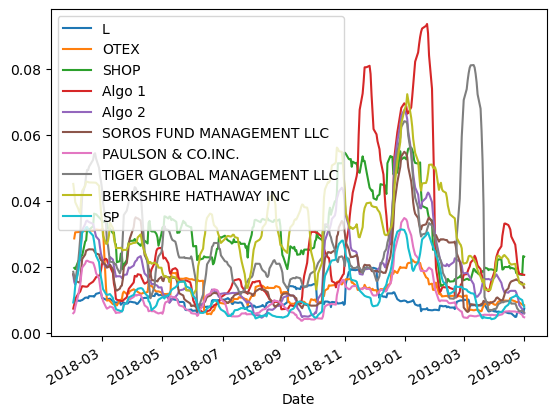

In [47]:
#calculate and plot -rolling std dev with 21day

all3.rolling(window=21).std().plot()

In [49]:
#calculate and plot correlation

all3_correlation = all3.corr()

<AxesSubplot:>

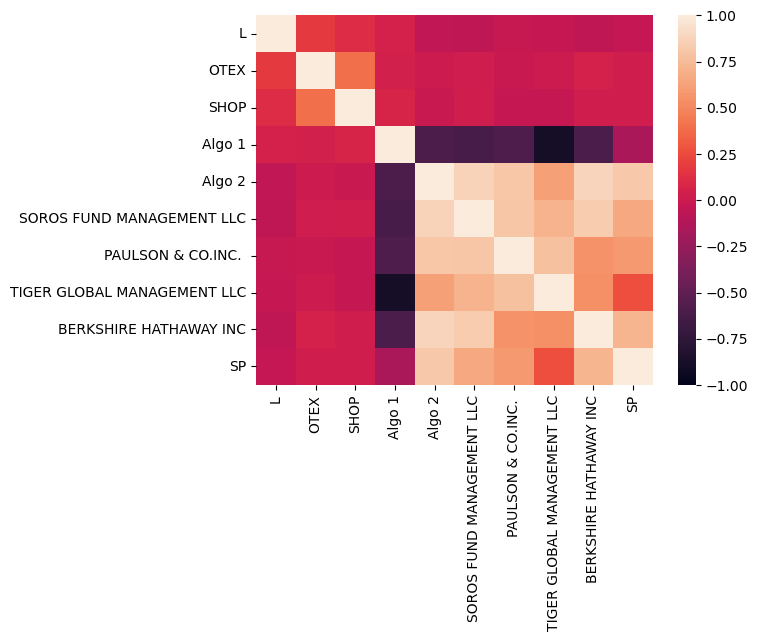

In [50]:
# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(all3_correlation, vmin=-1, vmax=1)

<AxesSubplot:xlabel='Date'>

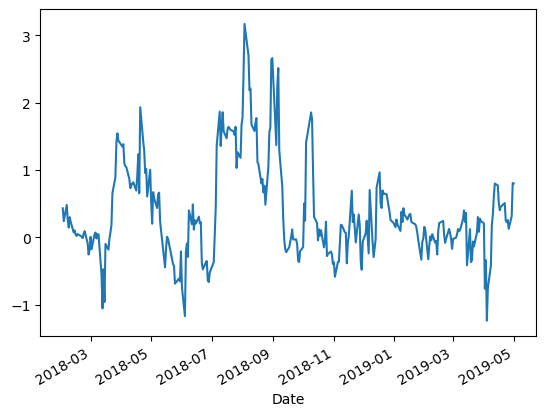

In [55]:
#calculate and plot beta compare with S&P 60 TSX
all3_rol_Variance=all3['SP'].rolling(window=21).var()
all3_rol_Covariance=all3['SHOP'].rolling(window=21).cov(allReturn1['SP'])
all3_beta=all3_rol_Covariance/all3_rol_Variance

all3_beta.plot()

In [56]:
#sharpe ratio
sharpe2=(all3.mean()*252)/(all3.std()*np.sqrt(252))
sharpe2.plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x7fc412e82fd0>>